In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,accuracy_score,classification_report

In [2]:
at = pd.read_csv(r"C:\Users\pushp\Desktop\DSBDA\datasets\heart_disease.csv",sep=',')
at

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
at.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [4]:
at.drop_duplicates()
at

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
at.mean(axis=0)

age          54.366337
sex           0.683168
cp            0.966997
trtbps      131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalachh    149.646865
exng          0.326733
oldpeak       1.039604
slp           1.399340
caa           0.729373
thall         2.313531
output        0.544554
dtype: float64

In [6]:
x = at['thall'].mean();
x
at['thall'].fillna(x,inplace=True)
at

C:\Users\pushp\AppData\Local\Temp\ipykernel_7524\3266051089.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  at['thall'].fillna(x,inplace=True)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
sub1 = at[:100][['age','sex','cp']]
sub1

,age,sex,cp
0,63,1,3
1,37,1,2
2,41,0,1
3,56,1,1
4,57,0,0
...,...,...,...
95,53,1,0
96,62,0,0
97,52,1,0
98,43,1,2


In [8]:
sub2 = at[:100][['cp','trtbps','chol']]
sub2

,cp,trtbps,chol
0,3,145,233
1,2,130,250
2,1,130,204
3,1,120,236
4,0,120,354
...,...,...,...
95,0,142,226
96,0,140,394
97,0,108,233
98,2,130,315


In [9]:
sub3 = at[:100][['age','trtbps','cp']]
sub3

,age,trtbps,cp
0,63,145,3
1,37,130,2
2,41,130,1
3,56,120,1
4,57,120,0
...,...,...,...
95,53,142,0
96,62,140,0
97,52,108,0
98,43,130,2


In [10]:
integ = pd.merge(sub1,sub2,on='cp')
integ

,age,sex,cp,trtbps,chol
0,63,1,3,145,233
1,63,1,3,110,211
2,63,1,3,150,283
3,63,1,3,150,226
4,63,1,3,140,239
...,...,...,...,...,...
3089,53,1,2,110,214
3090,53,1,2,124,255
3091,53,1,2,138,223
3092,53,1,2,130,315


In [11]:
concate = pd.concat([sub1,sub3],ignore_index=True)
concate

,age,sex,cp,trtbps
0,63,1.0,3,NaN
1,37,1.0,2,NaN
2,41,0.0,1,NaN
3,56,1.0,1,NaN
4,57,0.0,0,NaN
...,...,...,...,...
195,53,NaN,0,142.0
196,62,NaN,0,140.0
197,52,NaN,0,108.0
198,43,NaN,2,130.0


In [12]:
logar = np.log(at['age'])
logar

0      4.143135
1      3.610918
2      3.713572
3      4.025352
4      4.043051
         ...   
298    4.043051
299    3.806662
300    4.219508
301    4.043051
302    4.043051
Name: age, Length: 303, dtype: float64

In [13]:
squareval = np.square(at['age'])
squareval

0      3969
1      1369
2      1681
3      3136
4      3249
       ... 
298    3249
299    2025
300    4624
301    3249
302    3249
Name: age, Length: 303, dtype: int64

In [14]:
squareRootval = np.sqrt(at['age'])
squareRootval

0      7.937254
1      6.082763
2      6.403124
3      7.483315
4      7.549834
         ...   
298    7.549834
299    6.708204
300    8.246211
301    7.549834
302    7.549834
Name: age, Length: 303, dtype: float64

In [15]:
cubeval = (at['age']**3)
cubeval

0      250047
1       50653
2       68921
3      175616
4      185193
        ...  
298    185193
299     91125
300    314432
301    185193
302    185193
Name: age, Length: 303, dtype: int64

In [16]:
cubeRootval = np.cbrt(at['age'])
cubeRootval

0      3.979057
1      3.332222
2      3.448217
3      3.825862
4      3.848501
         ...   
298    3.848501
299    3.556893
300    4.081655
301    3.848501
302    3.848501
Name: age, Length: 303, dtype: float64

In [17]:
x = at.drop('output',axis=1)
y = at['output']

In [18]:
classifier = DecisionTreeClassifier()

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1)

In [20]:
classifier.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [21]:
y_pred = classifier.predict(xtest)

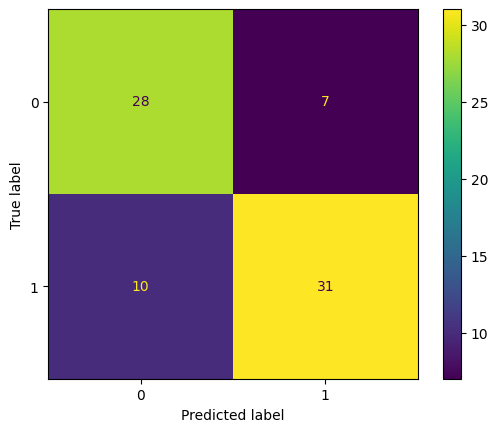

In [22]:
print(ConfusionMatrixDisplay.from_predictions(ytest,y_pred))

In [23]:
print(accuracy_score(ytest,y_pred))

0.7763157894736842


In [24]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        35
           1       0.82      0.76      0.78        41

    accuracy                           0.78        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.78      0.78      0.78        76



In [25]:
print(confusion_matrix(ytest,y_pred))

[[28  7]
 [10 31]]
